In [22]:
import pandas as pd
import inflect
from num2words import num2words
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
dados = pd.read_csv("dados/WHO-COVID-19-global-data.csv")

In [24]:
dados

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
305014,2023-07-08,ZW,Zimbabwe,AFRO,0,265604,0,5709
305015,2023-07-09,ZW,Zimbabwe,AFRO,0,265604,0,5709
305016,2023-07-10,ZW,Zimbabwe,AFRO,0,265604,0,5709
305017,2023-07-11,ZW,Zimbabwe,AFRO,0,265604,0,5709


In [25]:
colunas = dados.columns
colunas

Index(['Date_reported', 'Country_code', 'Country', 'WHO_region', 'New_cases',
       'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'],
      dtype='object')

In [26]:
mapa_nomes = {
    'Date_reported': 'Data',
    'Country_code': 'Código do País',
    'Country': 'País',
    'WHO_region': 'Região da OMS',
    'New_cases': 'Novos casos',
    'Cumulative_cases': 'Casos acumulados',
    'New_deaths': 'Novas mortes',
    'Cumulative_deaths': 'Mortes acumuladas'
}

# Renomeando as colunas
dados.rename(columns=mapa_nomes, inplace=True)

# Exibindo o DataFrame com as colunas renomeadas
dados

,Data,Código do País,País,Região da OMS,Novos casos,Casos acumulados,Novas mortes,Mortes acumuladas
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
305014,2023-07-08,ZW,Zimbabwe,AFRO,0,265604,0,5709
305015,2023-07-09,ZW,Zimbabwe,AFRO,0,265604,0,5709
305016,2023-07-10,ZW,Zimbabwe,AFRO,0,265604,0,5709
305017,2023-07-11,ZW,Zimbabwe,AFRO,0,265604,0,5709


In [27]:
for coluna in dados.columns:
    valores_unicos = dados[coluna].unique()
    print(f"Valores únicos da coluna '{coluna}':\n{valores_unicos}\n")

Valores únicos da coluna 'Data':
['2020-01-03' '2020-01-04' '2020-01-05' ... '2023-07-10' '2023-07-11'
 '2023-07-12']

Valores únicos da coluna 'Código do País':
['AF' 'AL' 'DZ' 'AS' 'AD' 'AO' 'AI' 'AG' 'AR' 'AM' 'AW' 'AU' 'AT' 'AZ'
 'BS' 'BH' 'BD' 'BB' 'BY' 'BE' 'BZ' 'BJ' 'BM' 'BT' 'BO' 'XA' 'BA' 'BW'
 'BR' 'VG' 'BN' 'BG' 'BF' 'BI' 'CV' 'KH' 'CM' 'CA' 'KY' 'CF' 'TD' 'CL'
 'CN' 'CO' 'KM' 'CG' 'CK' 'CR' 'CI' 'HR' 'CU' 'CW' 'CY' 'CZ' 'KP' 'CD'
 'DK' 'DJ' 'DM' 'DO' 'EC' 'EG' 'SV' 'GQ' 'ER' 'EE' 'SZ' 'ET' 'FK' 'FO'
 'FJ' 'FI' 'FR' 'GF' 'PF' 'GA' 'GM' 'GE' 'DE' 'GH' 'GI' 'GR' 'GL' 'GD'
 'GP' 'GU' 'GT' 'GG' 'GN' 'GW' 'GY' 'HT' 'VA' 'HN' 'HU' 'IS' 'IN' 'ID'
 'IR' 'IQ' 'IE' 'IM' 'IL' 'IT' 'JM' 'JP' 'JE' 'JO' 'KZ' 'KE' 'KI' 'XK'
 'KW' 'KG' 'LA' 'LV' 'LB' 'LS' 'LR' 'LY' 'LI' 'LT' 'LU' 'MG' 'MW' 'MY'
 'MV' 'ML' 'MT' 'MH' 'MQ' 'MR' 'MU' 'YT' 'MX' 'FM' 'MC' 'MN' 'ME' 'MS'
 'MA' 'MZ' 'MM' nan 'NR' 'NP' 'NL' 'NC' 'NZ' 'NI' 'NE' 'NG' 'NU' 'MK' 'MP'
 'NO' 'PS' 'OM' ' ' 'PK' 'PW' 'PA' 'PG' 'PY' 'PE' 'PH

In [28]:
dados['Data'] = pd.to_datetime(dados['Data'])

In [29]:
tipo_de_dados = dados.dtypes
tipo_de_dados

Data                 datetime64[ns]
Código do País               object
País                         object
Região da OMS                object
Novos casos                   int64
Casos acumulados              int64
Novas mortes                  int64
Mortes acumuladas             int64
dtype: object

In [30]:
dados_nulos = dados.isnull().sum()
dados_nulos

Data                    0
Código do País       1287
País                    0
Região da OMS           0
Novos casos             0
Casos acumulados        0
Novas mortes            0
Mortes acumuladas       0
dtype: int64

In [31]:
dados = dados.dropna()
dados

,Data,Código do País,País,Região da OMS,Novos casos,Casos acumulados,Novas mortes,Mortes acumuladas
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
305014,2023-07-08,ZW,Zimbabwe,AFRO,0,265604,0,5709
305015,2023-07-09,ZW,Zimbabwe,AFRO,0,265604,0,5709
305016,2023-07-10,ZW,Zimbabwe,AFRO,0,265604,0,5709
305017,2023-07-11,ZW,Zimbabwe,AFRO,0,265604,0,5709


In [32]:
dados['Ano'] = dados['Data'].dt.year

C:\Users\tassi\AppData\Local\Temp\ipykernel_29488\2961895218.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['Ano'] = dados['Data'].dt.year


In [33]:
dados_agrupados_por_ano = dados.groupby('Ano').agg({
    'Novos casos': 'sum',
    'Casos acumulados': 'max',
    'Novas mortes': 'sum',
    'Mortes acumuladas': 'max'
}).reset_index()

# Configurando o estilo do Seaborn
#sns.set(style="whitegrid")

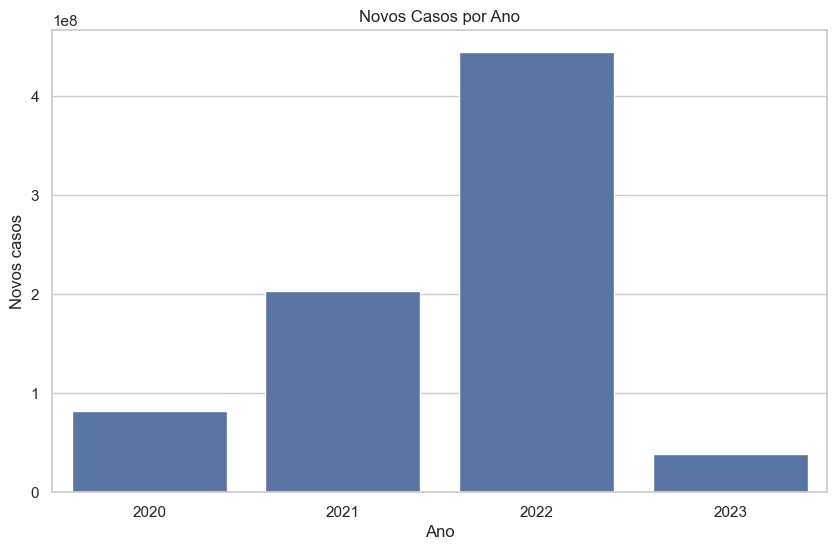

In [34]:
# Criando o gráfico de Novos Casos
plt.figure(figsize=(10, 6))
sns.barplot(x='Ano', y='Novos casos', data=dados_agrupados_por_ano, color='b')
plt.xlabel('Ano')
plt.ylabel('Novos casos')
plt.title('Novos Casos por Ano')
plt.show()


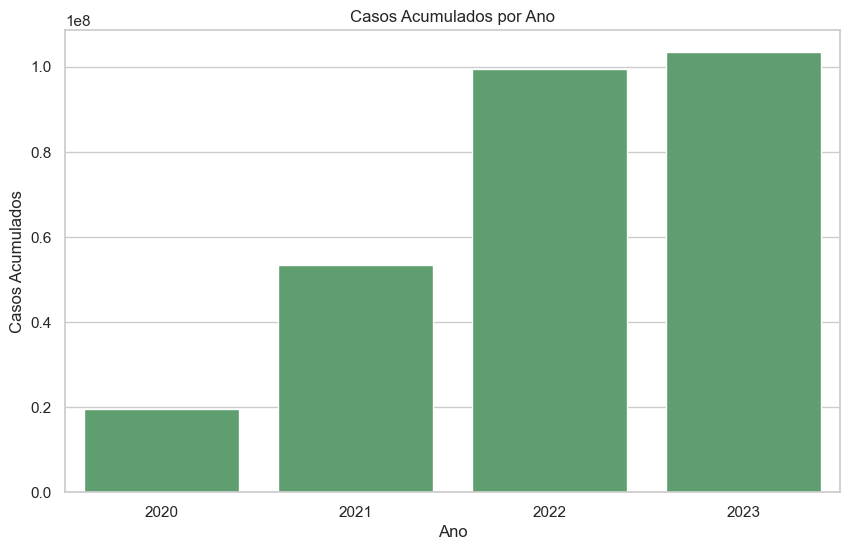

In [35]:
# Criando o gráfico de Casos Acumulados
plt.figure(figsize=(10, 6))
sns.barplot(x='Ano', y='Casos acumulados', data=dados_agrupados_por_ano, color='g')
plt.xlabel('Ano')
plt.ylabel('Casos Acumulados')
plt.title('Casos Acumulados por Ano')
plt.show()

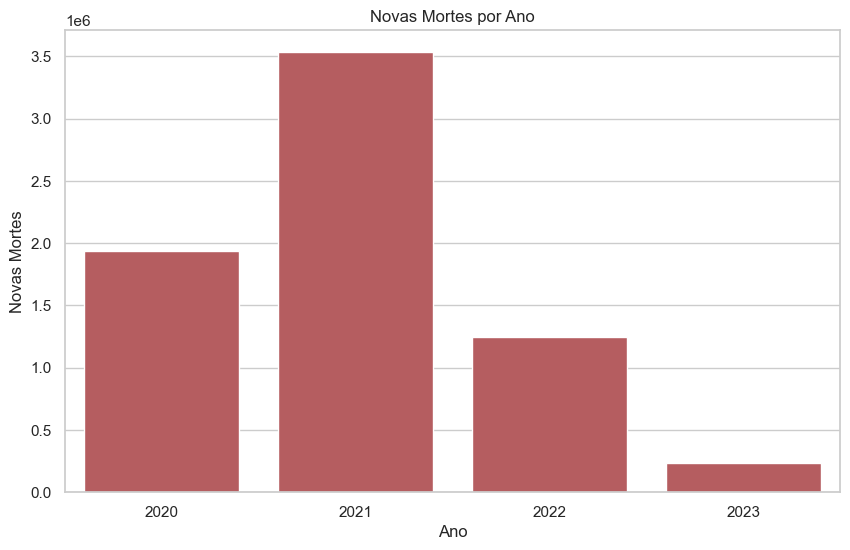

In [36]:
# Criando o gráfico de Novas Mortes
plt.figure(figsize=(10, 6))
sns.barplot(x='Ano', y='Novas mortes', data=dados_agrupados_por_ano, color='r')
plt.xlabel('Ano')
plt.ylabel('Novas Mortes')
plt.title('Novas Mortes por Ano')
plt.show()

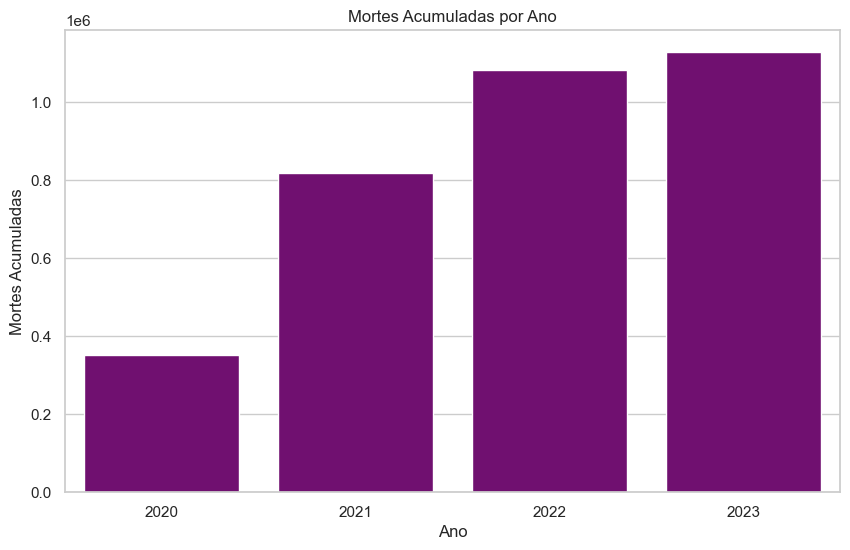

In [37]:
# Criando o gráfico de Mortes Acumuladas
plt.figure(figsize=(10, 6))
sns.barplot(x='Ano', y='Mortes acumuladas', data=dados_agrupados_por_ano, color='purple')
plt.xlabel('Ano')
plt.ylabel('Mortes Acumuladas')
plt.title('Mortes Acumuladas por Ano')
plt.show()

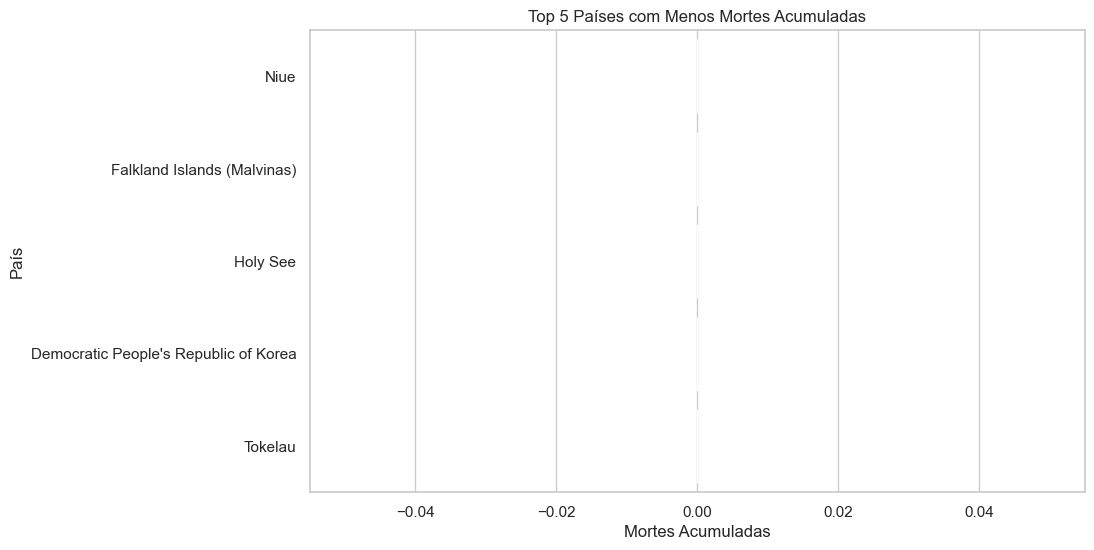

In [38]:
# Agrupando os dados por país e somando as mortes acumuladas
dados_agrupados_por_pais = dados.groupby('País')['Mortes acumuladas'].sum().reset_index()

# Ordenando os dados em ordem crescente de mortes acumuladas
dados_agrupados_por_pais = dados_agrupados_por_pais.sort_values(by='Mortes acumuladas')

# Selecionando os 5 países com menos mortes acumuladas
top_5_paises_menos_mortes = dados_agrupados_por_pais.head(5)

# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Mortes acumuladas', y='País', data=top_5_paises_menos_mortes, color='b')
plt.xlabel('Mortes Acumuladas')
plt.ylabel('País')
plt.title('Top 5 Países com Menos Mortes Acumuladas')
plt.show()

In [39]:
dados.columns

Index(['Data', 'Código do País', 'País', 'Região da OMS', 'Novos casos',
       'Casos acumulados', 'Novas mortes', 'Mortes acumuladas', 'Ano'],
      dtype='object')